In [5]:
import matplotlib.pyplot as plt

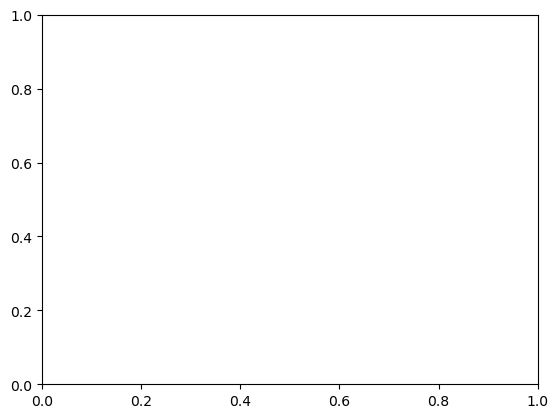

In [5]:
fig, ax = plt.subplots()

In [7]:
trial = [1, 2, 3, 4, 5, 6]
first_block = [50, 51.7, 58.8, 68.8, 71.9, 77.9]
middle_block = [50, 78.8, 83, 84.2, 90.1, 92.7]
last_block = [50, 96.9, 97.8, 98.1, 98.8, 98.7]

Text(0.5, 1.0, 'Learning')

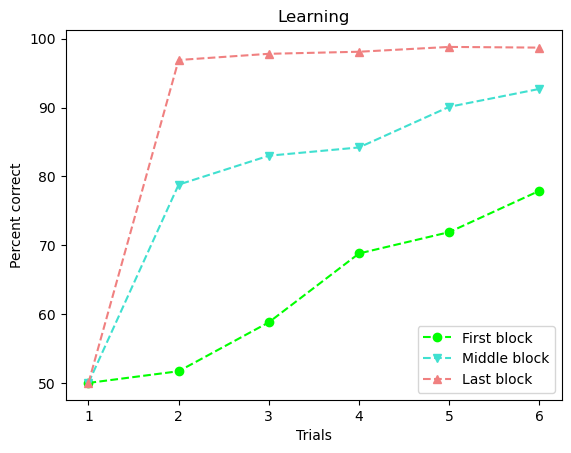

In [40]:
fig, ax = plt.subplots()
ax.plot(trial,first_block, marker='o', linestyle='--', color = 'lime', label = "First block")
ax.plot(trial,middle_block, marker='v', linestyle='--', color = 'turquoise', label = "Middle block")
ax.plot(trial,last_block, marker='^', linestyle='--', color = 'lightcoral', label = "Last block")
ax.legend()
ax.set_xlabel("Trials")
ax.set_ylabel("Percent correct")
ax.set_title("Learning")

In [1]:
import os
os.chdir(r'C:\Users\ASUS\Data science in neuroimaging\ndslib-main')
from ndslib.data import load_data

In [3]:
younger_fa, older_fa, tracts = load_data("age_groups_fa")

In [7]:
younger_fa

tractID                 nodeID
Callosum Forceps Major  0         0.203569
                        1         0.270106
                        2         0.313600
                        3         0.335859
                        4         0.356220
                                    ...   
Right Uncinate          95        0.320988
                        96        0.300516
                        97        0.270885
                        98        0.228221
                        99        0.181654
Name: fa, Length: 2000, dtype: float64

In [9]:
older_fa

tractID                 nodeID
Callosum Forceps Major  0         0.209548
                        1         0.286973
                        2         0.336935
                        3         0.367813
                        4         0.387926
                                    ...   
Right Uncinate          95        0.334594
                        96        0.312936
                        97        0.279929
                        98        0.232575
                        99        0.185208
Name: fa, Length: 2000, dtype: float64

In [11]:
tracts

array(['Left Thalamic Radiation', 'Right Thalamic Radiation',
       'Left Corticospinal', 'Right Corticospinal',
       'Left Cingulum Cingulate', 'Right Cingulum Cingulate',
       'Left Cingulum Hippocampus', 'Right Cingulum Hippocampus',
       'Callosum Forceps Major', 'Callosum Forceps Minor', 'Left IFOF',
       'Right IFOF', 'Left ILF', 'Right ILF', 'Left SLF', 'Right SLF',
       'Left Uncinate', 'Right Uncinate', 'Left Arcuate', 'Right Arcuate'],
      dtype=object)

In [13]:
older_fa['Left Thalamic Radiation']

nodeID
0     0.189002
1     0.241351
2     0.290617
3     0.324867
4     0.349591
        ...   
95    0.356713
96    0.344388
97    0.325894
98    0.298987
99    0.263786
Name: fa, Length: 100, dtype: float64

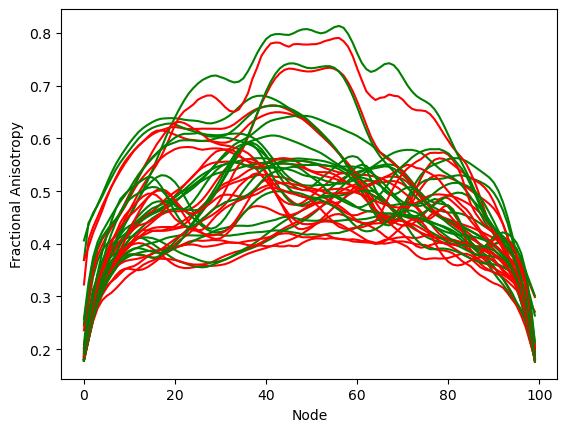

In [27]:
fig, ax = plt.subplots()
for i in tracts:
    ax.plot(younger_fa[i], color="r")
    ax.plot(older_fa[i], color="g")
ax.set_xlabel("Node")
label = ax.set_ylabel("Fractional Anisotropy")

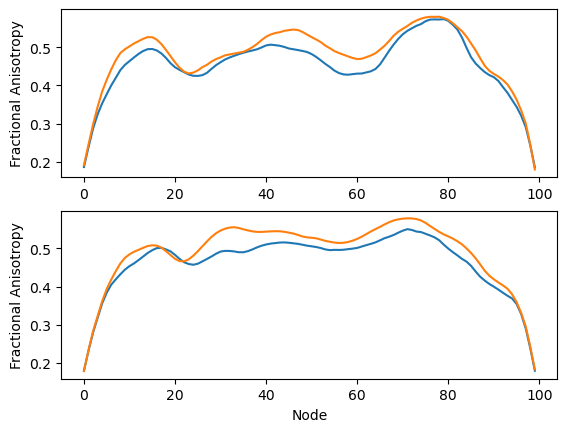

In [31]:
fig, [ax1, ax2] = plt.subplots(2)
ax1.plot(younger_fa["Right Arcuate"])
ax1.plot(older_fa["Right Arcuate"])
ax2.plot(younger_fa["Left Arcuate"])
ax2.plot(older_fa["Left Arcuate"])
ax2.set_ylabel("Fractional Anisotropy")
ax1.set_ylabel("Fractional Anisotropy")
label = ax2.set_xlabel("Node")

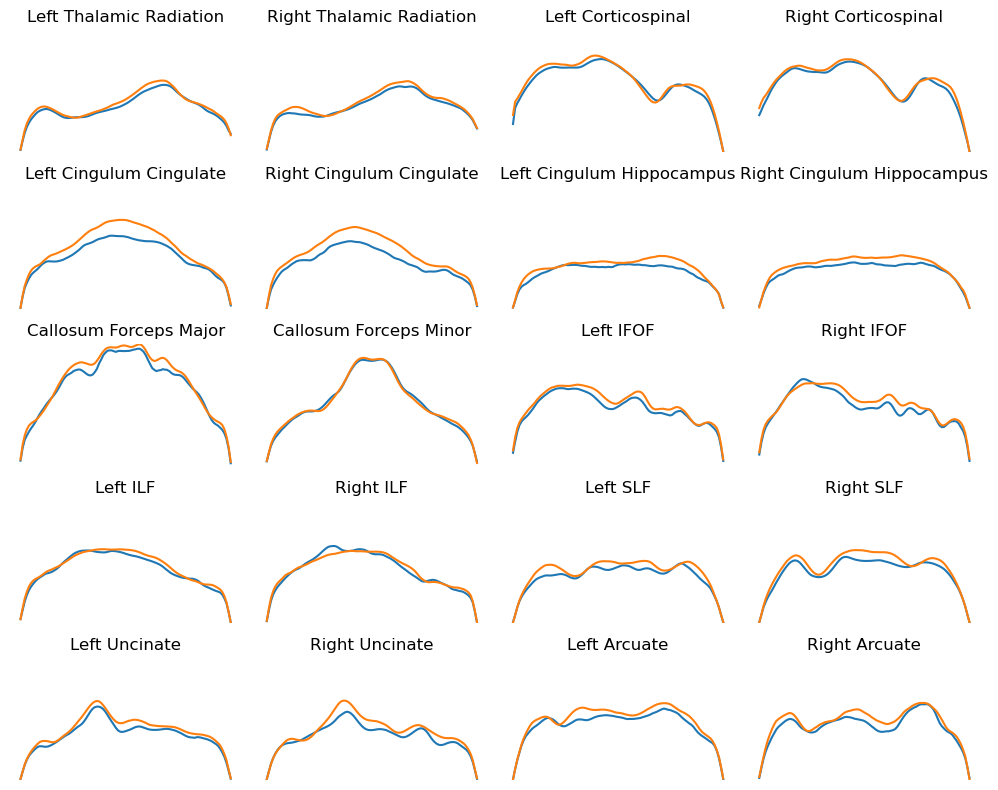

In [53]:
fig, ax = plt.subplots(5, 4)
for tract_idx in range(20):
    pathway = tracts[tract_idx]
    ax.flat[tract_idx].plot(younger_fa[pathway], color="C0")
    ax.flat[tract_idx].plot(older_fa[pathway], color="C1")
    ax.flat[tract_idx].set_title(pathway)
    ax.flat[tract_idx].axis("off")
    ax.flat[tract_idx].set_ylim(older_fa.min(),older_fa.max())
fig.set_tight_layout("tight")
fig.set_size_inches([10, 8])

In [43]:
younger_fa.max()

0.79080669468728

In [45]:
older_fa.max()

0.8136474707523077

In [49]:
older_fa.min()

0.17576058744072917

In [47]:
older_fa.min()

0.17576058744072917

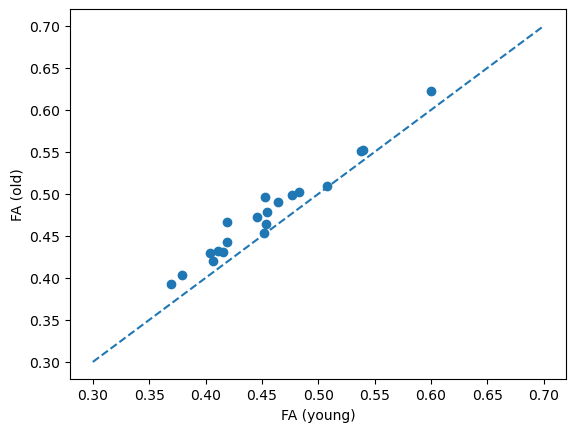

In [65]:
fig, ax = plt.subplots()

ax.scatter(younger_fa.groupby("tractID").mean(), older_fa.groupby("tractID").mean())
ax.plot([0.3, 0.7], [0.3, 0.7], linestyle='--')
ax.set_xlabel("FA (young)")
label = ax.set_ylabel("FA (old)")

In [67]:
import pandas as pd
import seaborn as sns
subjects = pd.read_csv(
"https://yeatmanlab.github.io/AFQBrowser-demo/data/subjects.csv",
usecols=[1,2,3,4,5,6,7],
na_values="NaN", index_col=0)

In [71]:
subjects.groupby(["Gender", "Handedness"]).mean(numeric_only = True)

Age          IQ  IQ_Matrix   IQ_Vocab
Gender Handedness                                             
Female Left        18.000000  111.500000  57.750000  55.250000
       Right       18.034483  122.080000  59.800000  64.720000
Male   Right       17.090909  122.413793  61.344828  63.517241

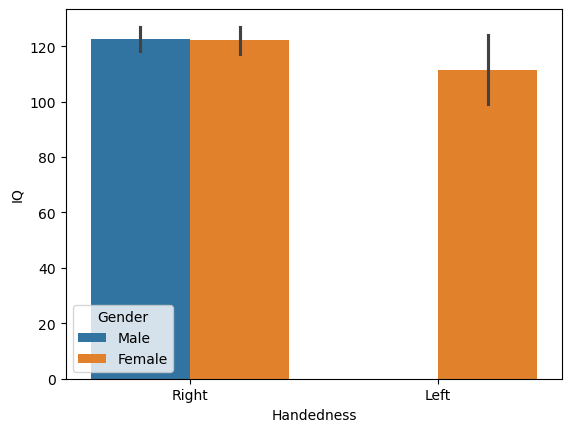

In [73]:
b = sns.barplot(data=subjects, x="Handedness", y="IQ", hue="Gender")

<Axes: xlabel='Handedness', ylabel='IQ'>

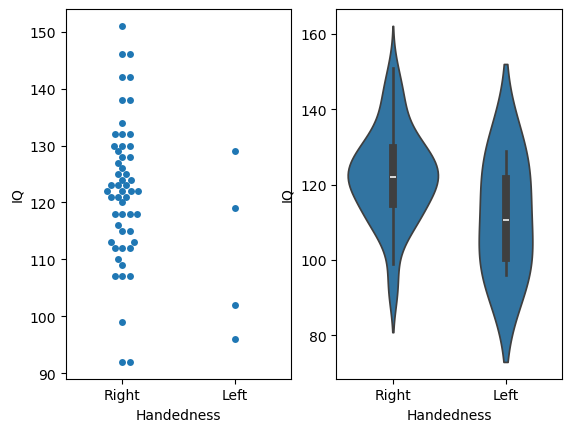

In [75]:
fig, ax = plt.subplots(1, 2)
sns.swarmplot(data=subjects, x="Handedness", y="IQ", ax=ax[0])
sns.violinplot(data=subjects, x="Handedness", y="IQ", ax=ax[1])

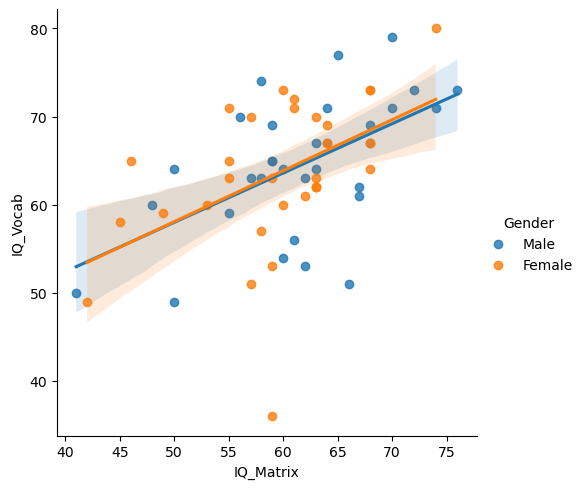

In [77]:
g = sns.lmplot(data=subjects, x="IQ_Matrix", y="IQ_Vocab", hue="Gender")

### Visualizing fMRI data

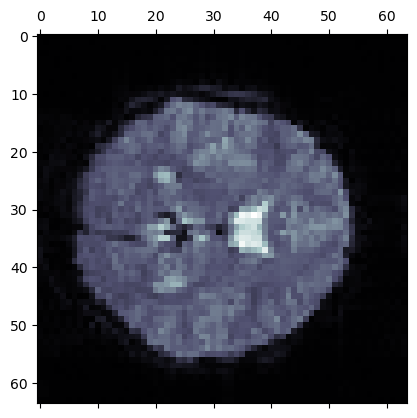

In [82]:
import numpy as np
from ndslib import load_data
bold = load_data("bold_numpy", fname="bold.npy")
bold.shape
fig, ax = plt.subplots()
im = ax.matshow(np.mean(bold, -1)[:, :, 10], cmap="bone")

In [86]:
bold.shape

(64, 64, 25, 180)